**Controle estatístico de processo**

Atividade-4_3-10 (Jupyter)

In [1]:
#Importando as bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
import numpy as np
from numpy.polynomial.polynomial import Polynomial

In [3]:
# Caminho para o arquivo Excel (substitua 'caminho_para_o_arquivo.xlsx' pelo caminho real do seu arquivo)
caminho_do_arquivo = 'Cap-03.xlsx'

# Ler o arquivo Excel
df = pd.read_excel(caminho_do_arquivo)

# Mostrar as primeiras linhas do arquivo
df.head()

,Exerc3-1,Exerc3-2,Exerc3-3,Exerc3-4,Exerc3-5,Exerc3-7,Exerc3-8 / Tabela 3E.1,Exerc3-9 / Tabela 3E.2,Exerc3-10 / Tabela 3E.3,Exerc3-16 / Tabela 3E.4,Exerc3-17 / Tabela 3E.5
0,16.05,50.001,21.0,6.0,953.0,96.0,127.0,94.1,13.3,8078.0,0.78
1,16.03,50.002,136.0,26.0,955.0,102.0,125.0,93.2,14.5,1891.0,9.59
2,16.02,49.998,185.0,8.0,948.0,104.0,131.0,90.6,15.3,13912.0,2.26
3,16.04,50.006,156.0,2.0,951.0,108.0,124.0,91.4,15.3,3407.0,8.13
4,16.05,50.005,3.0,6.0,957.0,126.0,129.0,88.2,14.3,6168.0,3.16


In [4]:
coluna = df['Exerc3-9 / Tabela 3E.2'].dropna()

media = coluna.mean()
print(f"Média: {media}")

desvio_padrao = coluna.std()
print(f"Desvio Padrão: {desvio_padrao}")

Média: 89.4755555555556
Desvio Padrão: 4.157768175926127


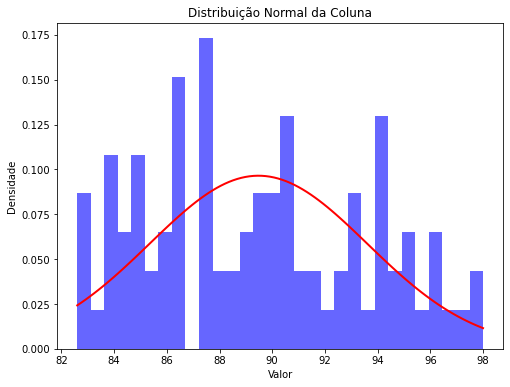

In [13]:
# Passo: Selecionar a coluna numérica de interesse
# Substitua 'Nome_da_Coluna' pelo nome da coluna que deseja usar para criar a distribuição
y = coluna

# Passo: Criar o gráfico de distribuição normal
plt.figure(figsize=(8, 6))
plt.hist(coluna, bins=30, density=True, alpha=0.6, color='b')

# Calcular a média e o desvio padrão da coluna
media = np.mean(coluna)
desvio_padrao = np.std(coluna)

# Gerar o gráfico da curva normal teórica
x = np.linspace(min(coluna), max(coluna), 100)
y = (1 / (np.sqrt(2 * np.pi) * desvio_padrao)) * np.exp(-0.5 * ((x - media) / desvio_padrao) ** 2)
plt.plot(x, y, 'r', linewidth=2)

# Configurar o título e os rótulos dos eixos
plt.title('Distribuição Normal da Coluna')
plt.xlabel('Valor')
plt.ylabel('Densidade')

# Mostrar o gráfico
plt.show()

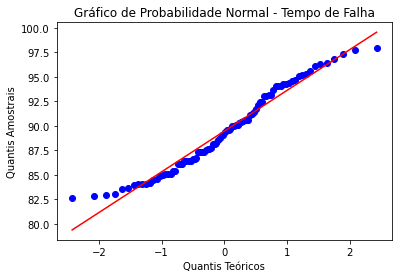

In [16]:
# Supondo que os dados do tempo de falha estão na primeira coluna
tempo_falha = coluna.values  # Pegando os valores da primeira coluna

# Criando o gráfico de probabilidade normal
stats.probplot(tempo_falha, dist="norm", plot=plt)

# Rótulos e título
plt.title("Gráfico de Probabilidade Normal - Tempo de Falha")
plt.xlabel("Quantis Teóricos")
plt.ylabel("Quantis Amostrais")

# Exibindo o gráfico
plt.show()

In [18]:
# Realizando o teste Anderson-Darling para a normalidade
resultado = stats.anderson(y, dist='norm')

# Exibindo o resultado do teste
print('Estatística do Teste - Anderson-Darling:', resultado.statistic)
print('Valores Críticos:', resultado.critical_values)
print('Níveis de Significância:', resultado.significance_level)

# Interpretação do teste:
for i in range(len(resultado.critical_values)):
    sl, cv = resultado.significance_level[i], resultado.critical_values[i]
    if resultado.statistic < cv:
        print(f"A {sl}% de nível de significância: Os dados seguem uma distribuição normal.")
    else:
        print(f"A {sl}% de nível de significância: Os dados NÃO seguem uma distribuição normal.")

Estatística do Teste - Anderson-Darling: 2.1778053161744566
Valores Críticos: [0.555 0.632 0.759 0.885 1.053]
Níveis de Significância: [15.  10.   5.   2.5  1. ]
A 15.0% de nível de significância: Os dados NÃO seguem uma distribuição normal.
A 10.0% de nível de significância: Os dados NÃO seguem uma distribuição normal.
A 5.0% de nível de significância: Os dados NÃO seguem uma distribuição normal.
A 2.5% de nível de significância: Os dados NÃO seguem uma distribuição normal.
A 1.0% de nível de significância: Os dados NÃO seguem uma distribuição normal.
